# Merge, Join and Concatenate

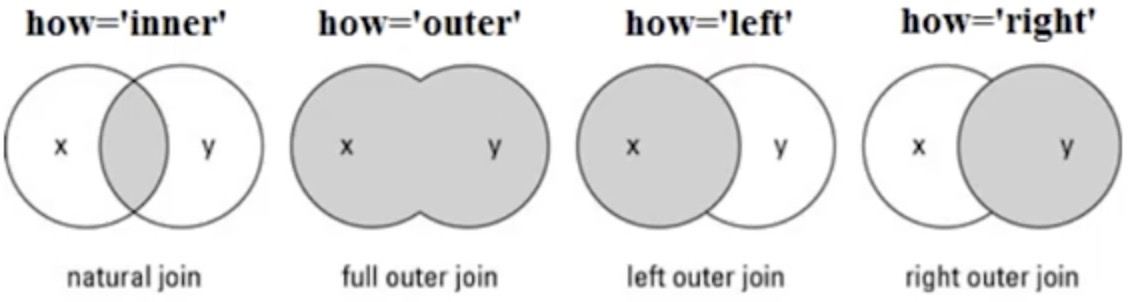

In [2]:
import pandas as pd

In [3]:
df1 = pd.read_csv('/Users/TophMan/Documents/Data Analysis Tutorial/csv files/LOTR.csv')
df1

,FellowshipID,FirstName,Skills
0,1001,Frodo,Hiding
1,1002,Samwise,Gardening
2,1003,Gandalf,Spells
3,1004,Pippin,Fireworks


In [4]:
df2 = pd.read_csv('/Users/TophMan/Documents/Data Analysis Tutorial/csv files/LOTR 2.csv')
df2

,FellowshipID,FirstName,Age
0,1001,Frodo,50
1,1002,Samwise,39
2,1006,Legolas,2931
3,1007,Elrond,6520
4,1008,Barromir,51


In [5]:
df1.merge(df2)

,FellowshipID,FirstName,Skills,Age
0,1001,Frodo,Hiding,50
1,1002,Samwise,Gardening,39


In [6]:
df1.merge(df2, how = 'inner', on = 'FellowshipID')

,FellowshipID,FirstName_x,Skills,FirstName_y,Age
0,1001,Frodo,Hiding,Frodo,50
1,1002,Samwise,Gardening,Samwise,39


In [7]:
df1.merge(df2, how = 'inner', on = ['FellowshipID', 'FirstName'])

,FellowshipID,FirstName,Skills,Age
0,1001,Frodo,Hiding,50
1,1002,Samwise,Gardening,39


In [8]:
df1.merge(df2, how = 'outer')

,FellowshipID,FirstName,Skills,Age
0,1001,Frodo,Hiding,50.0
1,1002,Samwise,Gardening,39.0
2,1003,Gandalf,Spells,NaN
3,1004,Pippin,Fireworks,NaN
4,1006,Legolas,NaN,2931.0
5,1007,Elrond,NaN,6520.0
6,1008,Barromir,NaN,51.0


In [9]:
df1.merge(df2, how = 'left')

,FellowshipID,FirstName,Skills,Age
0,1001,Frodo,Hiding,50.0
1,1002,Samwise,Gardening,39.0
2,1003,Gandalf,Spells,NaN
3,1004,Pippin,Fireworks,NaN


In [10]:
df1.merge(df2, how = 'right')

,FellowshipID,FirstName,Skills,Age
0,1001,Frodo,Hiding,50
1,1002,Samwise,Gardening,39
2,1006,Legolas,NaN,2931
3,1007,Elrond,NaN,6520
4,1008,Barromir,NaN,51


In [13]:
# df1.merge(df2, how = 'cross')

In [16]:
df1.join(df2, on = 'FellowshipID', how = 'outer', lsuffix = '_lfet', rsuffix = '_right' )

,FellowshipID,FellowshipID_lfet,FirstName_lfet,Skills,FellowshipID_right,FirstName_right,Age
0.0,1001,1001.0,Frodo,Hiding,NaN,NaN,NaN
1.0,1002,1002.0,Samwise,Gardening,NaN,NaN,NaN
2.0,1003,1003.0,Gandalf,Spells,NaN,NaN,NaN
3.0,1004,1004.0,Pippin,Fireworks,NaN,NaN,NaN
NaN,0,NaN,NaN,NaN,1001.0,Frodo,50.0
NaN,1,NaN,NaN,NaN,1002.0,Samwise,39.0
NaN,2,NaN,NaN,NaN,1006.0,Legolas,2931.0
NaN,3,NaN,NaN,NaN,1007.0,Elrond,6520.0
NaN,4,NaN,NaN,NaN,1008.0,Barromir,51.0


In [19]:
df4 = df1.set_index('FellowshipID').join(df2.set_index('FellowshipID'), lsuffix = '_lfet', rsuffix = '_right', how = 'outer')
df4

,FirstName_lfet,Skills,FirstName_right,Age
FellowshipID,,,,
1001,Frodo,Hiding,Frodo,50.0
1002,Samwise,Gardening,Samwise,39.0
1003,Gandalf,Spells,NaN,NaN
1004,Pippin,Fireworks,NaN,NaN
1006,NaN,NaN,Legolas,2931.0
1007,NaN,NaN,Elrond,6520.0
1008,NaN,NaN,Barromir,51.0


In [21]:
pd.concat([df1, df2])

,FellowshipID,FirstName,Skills,Age
0,1001,Frodo,Hiding,NaN
1,1002,Samwise,Gardening,NaN
2,1003,Gandalf,Spells,NaN
3,1004,Pippin,Fireworks,NaN
0,1001,Frodo,NaN,50.0
1,1002,Samwise,NaN,39.0
2,1006,Legolas,NaN,2931.0
3,1007,Elrond,NaN,6520.0
4,1008,Barromir,NaN,51.0


In [22]:
pd.concat([df1, df2], join = 'inner')

,FellowshipID,FirstName
0,1001,Frodo
1,1002,Samwise
2,1003,Gandalf
3,1004,Pippin
0,1001,Frodo
1,1002,Samwise
2,1006,Legolas
3,1007,Elrond
4,1008,Barromir


In [23]:
pd.concat([df1, df2], join = 'outer')

,FellowshipID,FirstName,Skills,Age
0,1001,Frodo,Hiding,NaN
1,1002,Samwise,Gardening,NaN
2,1003,Gandalf,Spells,NaN
3,1004,Pippin,Fireworks,NaN
0,1001,Frodo,NaN,50.0
1,1002,Samwise,NaN,39.0
2,1006,Legolas,NaN,2931.0
3,1007,Elrond,NaN,6520.0
4,1008,Barromir,NaN,51.0


In [24]:
pd.concat([df1, df2], join = 'outer', axis = 1)

,FellowshipID,FirstName,Skills,FellowshipID,FirstName,Age
0,1001.0,Frodo,Hiding,1001,Frodo,50
1,1002.0,Samwise,Gardening,1002,Samwise,39
2,1003.0,Gandalf,Spells,1006,Legolas,2931
3,1004.0,Pippin,Fireworks,1007,Elrond,6520
4,NaN,NaN,NaN,1008,Barromir,51


In [25]:
df1.append(df2)

,FellowshipID,FirstName,Skills,Age
0,1001,Frodo,Hiding,NaN
1,1002,Samwise,Gardening,NaN
2,1003,Gandalf,Spells,NaN
3,1004,Pippin,Fireworks,NaN
0,1001,Frodo,NaN,50.0
1,1002,Samwise,NaN,39.0
2,1006,Legolas,NaN,2931.0
3,1007,Elrond,NaN,6520.0
4,1008,Barromir,NaN,51.0
